In [3]:
import numpy as np
import matplotlib.pyplot as plt

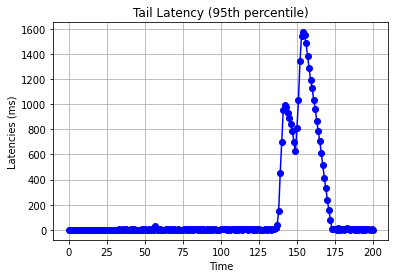

In [3]:
# Read data from output.txt
with open('output1.txt', 'r') as file:
    data = [float(line.strip()) for line in file]

# Plot the data
plt.plot(data[1:], marker='o', linestyle='-', color='b')
plt.title('Tail Latency (95th percentile)')
plt.xlabel('Time')
plt.ylabel('Latencies (ms)')
plt.grid(True)
plt.show()

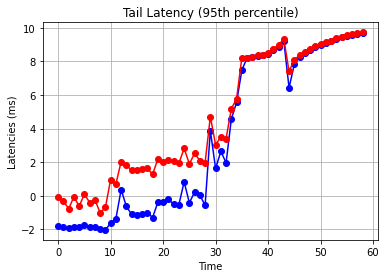

In [15]:
# Read data from output.txt
with open('test.txt', 'r') as file:
    latency_t = []
    mean_t = []
    std_t = []
    for line in file:
        data = [float(value) for value in line.strip().split()]
        latency_t += [np.log(data[0])]
        mean_t += [np.log(data[1])]
        std_t += [data[2]]

# Plot the data
plt.plot(mean_t, marker='o', linestyle='-', color='b')
plt.plot(latency_t, marker='o', linestyle='-', color='r')
plt.title('Tail Latency (95th percentile)')
plt.xlabel('Time')
plt.ylabel('Latencies (ms)')
plt.grid(True)
plt.show()

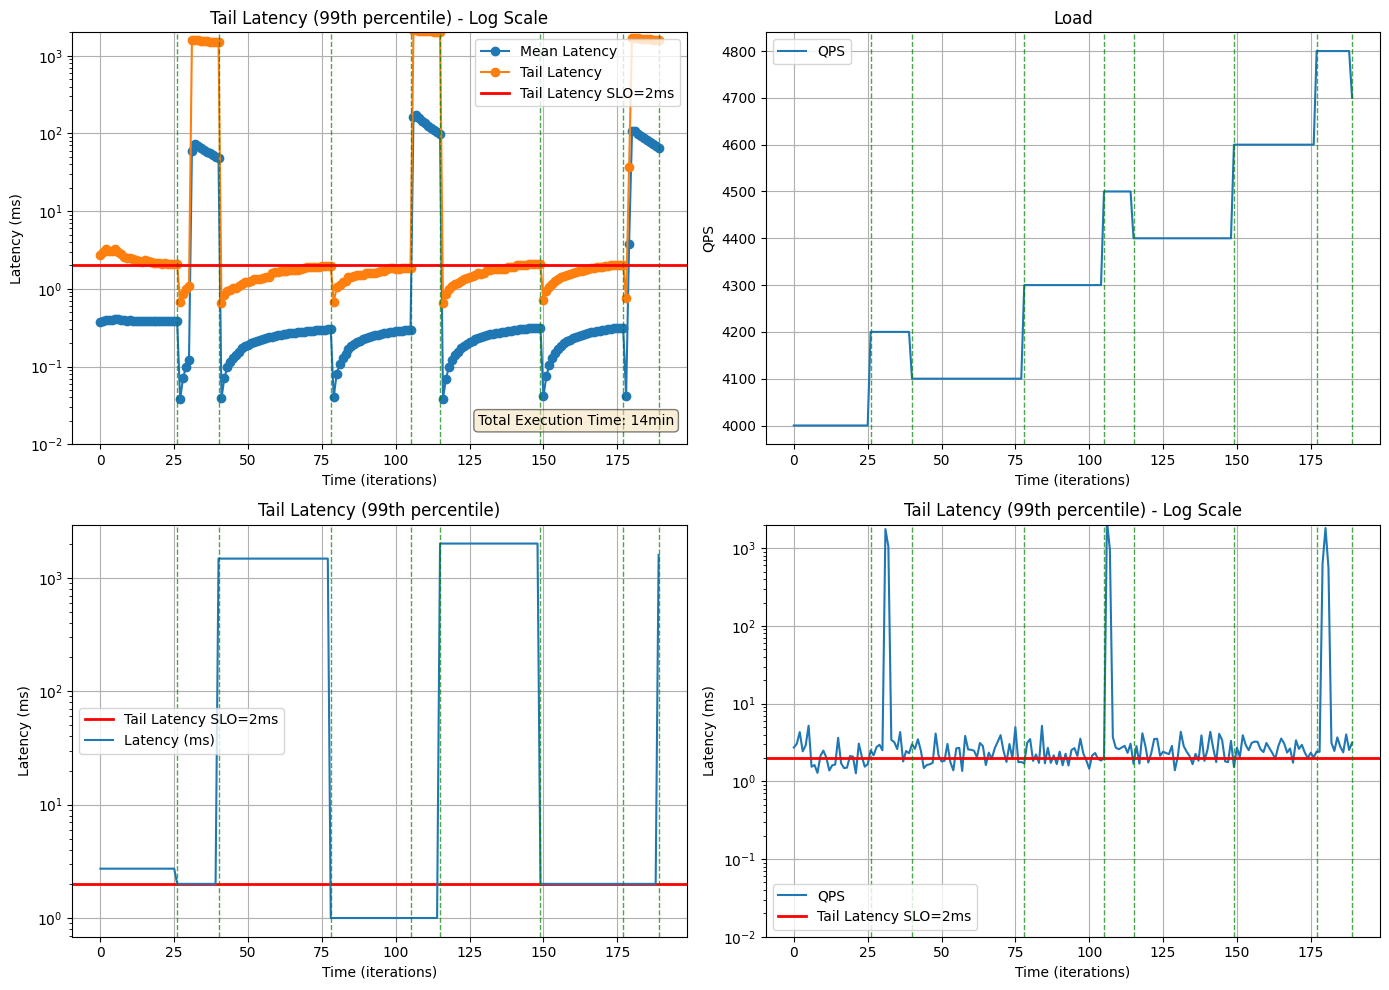

In [96]:
import numpy as np
import matplotlib.pyplot as plt

percentile, QPS, time, tolerance, SLO = 0, 0, 0, 0, 0
with open('args.txt', 'r') as file:
    for line in file:
        data = [float(value) for value in line.strip().split()]
        percentile = int(data[0])
        QPS = int(data[1])
        time = int(data[2])
        tolerance = data[3]
        SLO = data[4]

# Read data from output.txt
latency_t = []
mean_t = []
std_t = []
sample_lats = []
with open('test.txt', 'r') as file:
    for line in file:
        data = [float(value) for value in line.strip().split()]
        latency_t += [data[0]]
        mean_t += [data[1]]
        std_t += [data[2]]
        sample_lats += [data[3]]

iteration = []
qps_t = []
lats = []

with open('qps.txt', 'r') as file:
    for line in file:
        data = [float(value) for value in line.strip().split()]
        iteration += [data[0]]
        qps_t += [data[1]]
        lats += [data[2]]
        
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
ax1, ax2, ax3, ax4 = axes.flatten()

# Graph 1
ax1.plot(mean_t, marker='o', linestyle='-', label='Mean Latency')
ax1.plot(latency_t, marker='o', linestyle='-', label='Tail Latency')
ax1.set_yscale('log')
ax1.set_title(f'Tail Latency ({percentile}th percentile) - Log Scale')
ax1.set_xlabel('Time (iterations)')
ax1.set_ylabel('Latency (ms)')
ax1.grid(True)
ax1.set_ylim(0.01, 2000)
ax1.axhline(SLO, color='red', linewidth=2, label=f'Tail Latency SLO={SLO}ms')
ax1.legend(loc='upper right')
for value in iteration:
    ax1.axvline(value, color='green', linestyle='--', linewidth=1, alpha=0.7)

ax1.text(0.98, 0.04, f'Total Execution Time: {time}min', transform=ax1.transAxes,
         fontsize=10, verticalalignment='bottom', horizontalalignment='right',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Graph 2
tab = [QPS] * int(iteration[0])
for j in range(1, len(iteration)):
    for i in range(int(iteration[j-1]), int(iteration[j])):
        tab += [qps_t[j-1]]
tab += [qps_t[-1]] * int(len(latency_t) - iteration[-1])

ax2.plot(tab, linestyle='-', label='QPS')
ax2.set_title('Load')
ax2.set_xlabel('Time (iterations)')
ax2.set_ylabel('QPS')
ax2.grid(True)
ax2.legend()
for value in iteration:
    ax2.axvline(value, color='green', linestyle='--', linewidth=1, alpha=0.7)

# Graph 3
tab2 = [latency_t[0]] * int(iteration[0])
for j in range(1, len(iteration)):
    for i in range(int(iteration[j-1]), int(iteration[j])):
        tab2 += [lats[j-1]]
tab2 += [lats[-1]] * int(len(latency_t) - iteration[-1])
ax3.axhline(SLO, color='red', linewidth=2, label=f'Tail Latency SLO={SLO}ms')
ax3.plot(tab2, linestyle='-', label='Latency (ms)')
ax3.set_yscale('log')
ax3.set_title(f'Tail Latency ({percentile}th percentile)')
ax3.set_xlabel('Time (iterations)')
ax3.set_ylabel('Latency (ms)')
#ax3.set_ylim(0.01, 2*SLO)
ax3.grid(True)
ax3.legend()
for value in iteration:
    ax3.axvline(value, color='green', linestyle='--', linewidth=1, alpha=0.7)


ax4.plot(sample_lats, linestyle='-', label='QPS')
ax4.set_yscale('log')
ax4.set_title('Tail Latency (99th percentile) - Log Scale')
ax4.set_xlabel('Time (iterations)')
ax4.set_ylabel('Latency (ms)')
ax4.grid(True)
ax4.set_ylim(0.01, 2000)
ax4.axhline(SLO, color='red', linewidth=2, label=f'Tail Latency SLO={SLO}ms')
ax4.legend()
for value in iteration:
    ax4.axvline(value, color='green', linestyle='--', linewidth=1, alpha=0.7)

plt.tight_layout()
plt.show()

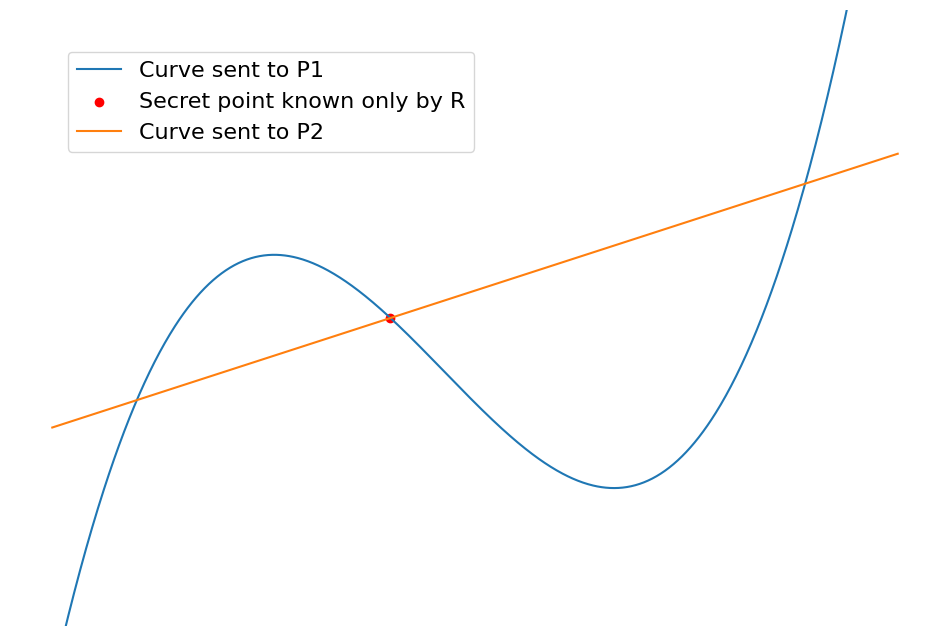

In [87]:
import numpy as np
import matplotlib.pyplot as plt

# Data points
x_points = np.array([-4, -1, 2, 4])
y_points = np.array([-4, 0, -8, 8])

# Fit a polynomial of degree 3 (since we have 4 points)
coefficients = np.polyfit(x_points, y_points, 3)

# Generate sample data
x = np.linspace(-5, 5, 1000)

# Calculate the corresponding y values for the polynomial curve
y = np.polyval(coefficients, x)
plt.figure(figsize=(12, 8))
# Plot the polynomial curve
plt.plot(x, y, label=f'Curve sent to P1')
plt.scatter([-1], [0], color='red', label='Secret point known only by R')

# Given two points (x1, y1) and (x2, y2)
x1, y1 = -4, -4
x2, y2 = -1, 0
# Calculate slope and intercept
slope = (y2 - y1) / (x2 - x1)
intercept = y1 - slope * x1
# Calculate corresponding y values for the line
y_line = slope * x + intercept
# Plot the line
plt.plot(x, y_line, label='Curve sent to P2')


plt.axis('off')
# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-15, 15)
#plt.legend(fontsize='large', loc='upper left', bbox_to_anchor=(1, 1)) 
plt.legend(loc='upper left', bbox_to_anchor=(0.05, 0.95), fontsize=16)
# Show the plot
plt.savefig('curves.png')

plt.show()


